In [1]:
# Start by importing the needed packages into my notebook
# Import Data analysis packages
import numpy as np
import pandas as pd
# Import the stats librayr from numpy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#char_studio pushes your charts to the cloud 
#import chart_studio.plotly as py
#plotly.offline doesn't push your charts to the clouds
import plotly.offline as pyo
#allows us to create the Data and Figure objects
from plotly.graph_objs import *

In [3]:
from sklearn.utils import shuffle
#lets us see the charts in an iPython Notebook
pyo.offline.init_notebook_mode() # run at the start of every ipython

In [6]:
#Importing Maize Dataframe
data_df=pd.read_csv("sas_meteo_data_final1.csv")
data_df.head()

Unnamed: 0       combined_id   Unique_id  Segment_id Province_name  \
0           0   1111032Season A   1111032.0    111103.0        Kigali   
1           1   1111035Season A   1111035.0    111103.0        Kigali   
2           2   1111036Season A   1111036.0    111103.0        Kigali   
3           3   1111037Season A   1111037.0    111103.0        Kigali   
4           4  11110311Season A  11110311.0    111103.0        Kigali   

  District_name  Plot_number  Plot_Area_sqm Cropping_system  Number_of_crops  \
0    NYARUGENGE          2.0     524.663147           Mixed              2.0   
1    NYARUGENGE          5.0    1007.767700           Mixed              3.0   
2    NYARUGENGE          6.0     548.204956            Pure              1.0   
3    NYARUGENGE          7.0     259.339569           Mixed              2.0   
4    NYARUGENGE         11.0    4524.874512           Mixed              2.0   

   ... Coeff_harvested   Coeff_seed Coeff_fertiliser  \
0  ...      217.826846   108.913423         0.000000   
1  ...     1562.860212  2250.000000         0.000000   
2  ...      608.045082   152.011270      4560.338114   
3  ...     1071.096815   171.375490      3213.290444   
4  ...      663.001859    73.666873         0.000000   

  Coeff_inorganic_fertiliser Qtity_inorganic_npk Qtity_inorganic_urea  \
0                        0.0                 0.0                  0.0   
1                        0.0                 0.0                  0.0   
2                        0.0                 0.0                  0.0   
3                        0.0                 0.0                  0.0   
4                        0.0                 0.0                  0.0   

   Coeff_inorganic_meter_npk Coeff_inorganic_npk  Coeff_inorganic_meter_urea  \
0                        0.0                 0.0                         0.0   
1                        0.0                 0.0                         0.0   
2                        0.0                 0.0                         0.0   
3                        0.0                 0.0                         0.0   
4                        0.0                 0.0                         0.0   

   Coeff_inorganic_urea  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 59 columns]

In [7]:
data_df['Crop_name'].value_counts()

Maize             28975
Bush bean         25837
Climbing bean     10024
Irish potato       9296
Paddy rice         2602
Small red bean       43
Name: Crop_name, dtype: int64

In [8]:
data_df.shape

(76777, 59)

In [9]:
data_df['Crop_name']=data_df['Crop_name'].str.replace("Small red bean","Bush bean")

In [10]:
data_df['Crop_name'].unique()

array(['Bush bean', 'Irish potato', 'Maize', 'Climbing bean',
       'Paddy rice'], dtype=object)

In [11]:
Beans_df=data_df[data_df['Crop_name']=='Bush bean']

In [12]:
Beans_df.isnull().sum()

Unnamed: 0                              0
combined_id                             0
Unique_id                               0
Segment_id                              0
Province_name                           0
District_name                           0
Plot_number                             0
Plot_Area_sqm                        4906
Cropping_system                         0
Number_of_crops                         0
Crop_name                               0
Crop_Area_sqm                          78
Type_seeds_sown                        78
Season                                  0
Season1                                 0
CropGroup                               0
Crop_Area_ha                            0
Agri_year                               0
Qtity_seeds_sown                        0
Total_qtity_harvested                   0
Usage_organic_fertilizer                0
Qtity_organic_fertiliser                0
Usage_inorganic_fertilizer              0
inOrganic_fertiliser_type         

In [13]:
Beans_data=Beans_df.values

In [14]:
Qtity_seeds_sown=[]
for maize in Beans_data:
    i=maize[-9]
    if i>=150:
        Qtity_seeds_sown.append(170) 
    elif (i>=130)&(i<150):
        Qtity_seeds_sown.append(67)
    elif (i>=110)&(i<130):
        Qtity_seeds_sown.append(65)
    elif (i>=90)&(i<110):
        Qtity_seeds_sown.append(64)
    elif (i>=80)&(i<90):
        Qtity_seeds_sown.append(63)
    elif (i>=70)&(i<80):
        Qtity_seeds_sown.append(62)
    elif (i>=65)&(i<70):
        Qtity_seeds_sown.append(61)
    elif (i>=60)&(i<65):
        Qtity_seeds_sown.append(60)
    elif (i<5):
        Qtity_seeds_sown.append(20)
    elif (i>=5)&(i<10):
        Qtity_seeds_sown.append(22)
    elif (i>=10)&(i<15):
        Qtity_seeds_sown.append(23)
    elif (i>=15)&(i<17):
        Qtity_seeds_sown.append(24)
    elif (i>=17)&(i<19):
        Qtity_seeds_sown.append(25)
    elif (i>=19)&(i<21):
        Qtity_seeds_sown.append(26)
    elif (i>=21)&(i<23):
        Qtity_seeds_sown.append(27)
    elif (i>=23)&(i<25):
        Qtity_seeds_sown.append(28)
    elif (i>=25)&(i<27):
        Qtity_seeds_sown.append(29)
    elif (i>=27)&(i<29):
        Qtity_seeds_sown.append(30)
    elif (i>=29)&(i<31):
        Qtity_seeds_sown.append(31)
    else:
        Qtity_seeds_sown.append(i)

In [15]:
Beans_df['Total_qtity_seeds_sown']=Qtity_seeds_sown

<ipython-input-15-b3b60cc5c92c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
Beans_df['Real_qtity_seeds_sown']=(Beans_df['Total_qtity_seeds_sown']*Beans_df['crop_area_sq'])/10000

<ipython-input-16-f566022ae1d2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



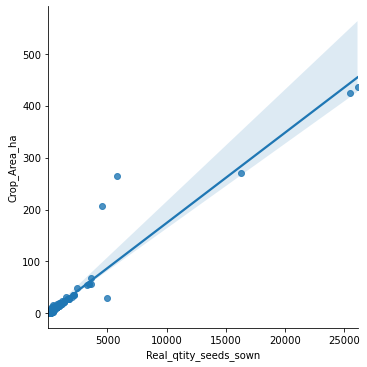

In [17]:
sns.lmplot(x='Real_qtity_seeds_sown',y='Crop_Area_ha',data=Beans_df)

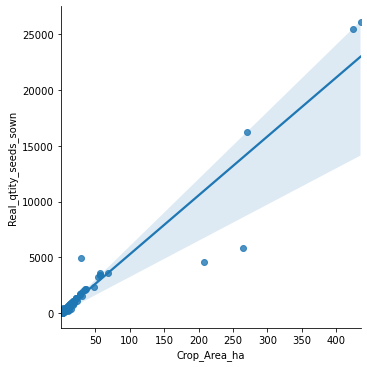

In [18]:
sns.lmplot(x='Crop_Area_ha',y='Real_qtity_seeds_sown',data=Beans_df)

In [19]:
Beans_data1=Beans_df.values

In [20]:
Qtity_Harvested=[]
for qtity in Beans_data1:
    i=qtity[-12]
    if i<100:
        Qtity_Harvested.append(500) 
    elif (i>=100)&(i<200):
        Qtity_Harvested.append(510)
    elif (i>=200)&(i<250):
        Qtity_Harvested.append(520)
    elif (i>=250)&(i<300):
        Qtity_Harvested.append(530)
    elif (i>=300)&(i<350):
        Qtity_Harvested.append(540)
    elif (i>=350)&(i<400):
        Qtity_Harvested.append(550)
    elif (i>=400)&(i<450):
        Qtity_Harvested.append(560)
    elif (i>=450)&(i<500):
        Qtity_Harvested.append(570)
    elif (i>=500)&(i<550):
        Qtity_Harvested.append(580)
    elif (i>=550)&(i<570):
        Qtity_Harvested.append(590)
    elif (i>=570)&(i<580):
        Qtity_Harvested.append(600)
    elif (i>=580)&(i<590):
        Qtity_Harvested.append(610)
    elif (i>=590)&(i<600):
        Qtity_Harvested.append(620)
    else:
        Qtity_Harvested.append(i)

In [21]:
Beans_df['Total_qtity_harvested']=Qtity_Harvested

<ipython-input-21-fef4f364f237>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
Beans_df['Real_qtity_harvested']=(Beans_df['Total_qtity_harvested']*Beans_df['crop_area_sq'])/10000

<ipython-input-22-374fee956c4b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



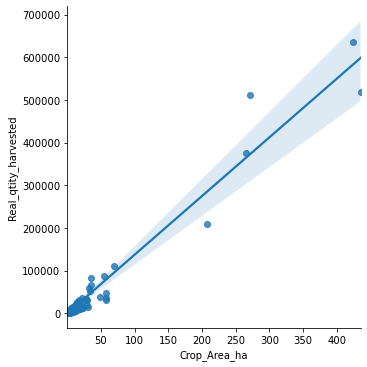

In [23]:
sns.lmplot(x='Crop_Area_ha',y='Real_qtity_harvested',data=Beans_df)

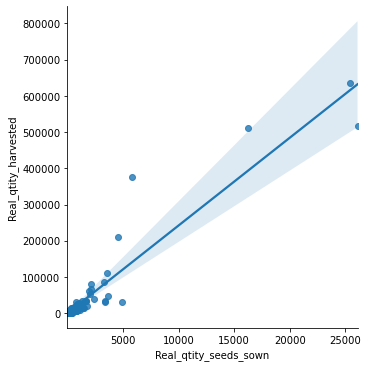

In [24]:
sns.lmplot(x='Real_qtity_seeds_sown',y='Real_qtity_harvested',data=Beans_df)

In [25]:
Beans_data2=Beans_df.values

In [26]:
Qtity_organic_fertiliser=[]
for organic in Beans_data:
    area=organic[45]
    j=organic[-11]
    if (j==0):
        Qtity_organic_fertiliser.append(1000)
    if (j>0)&(j<100):
        Qtity_organic_fertiliser.append(1200)
    elif (j>=100)&(j<200):
        Qtity_organic_fertiliser.append(1300)
    elif (j>=200)&(j<400):
        Qtity_organic_fertiliser.append(1400)
    elif (j>=400)&(j<600):
        Qtity_organic_fertiliser.append(1600)
    elif (j>=600)&(j<=800):
        Qtity_organic_fertiliser.append(1700)
    elif (j>=800)&(j<=1000):
        Qtity_organic_fertiliser.append(1800)
    elif (j>=50000):
        Qtity_Harvested.append(22000)
    elif (j>=40000)&(j<50000):
        Qtity_organic_fertiliser.append(21500)
    elif (j>=30000)&(j<40000):
        Qtity_organic_fertiliser.append(21000)
    elif (j>=20000)&(j<30000):
        Qtity_organic_fertiliser.append(20500)
    else:
        Qtity_Harvested.append(j)

In [27]:
Beans_df['Total_qtity_organic_fertiliser']=Qtity_organic_fertiliser

<ipython-input-27-0176dd939331>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
Beans_df['Real_qtity_organic_fertiliser']=(Beans_df['Total_qtity_organic_fertiliser']*Beans_df['crop_area_sq'])/10000

<ipython-input-28-12baab16a14b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



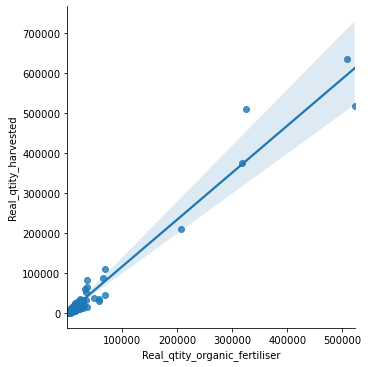

In [29]:
sns.lmplot(x='Real_qtity_organic_fertiliser',y='Real_qtity_harvested',data=Beans_df)

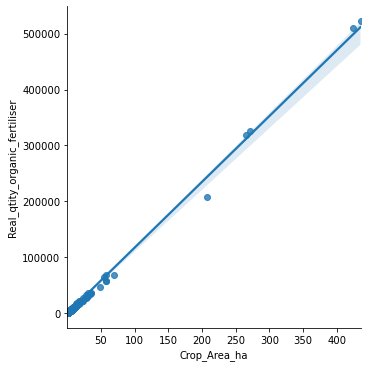

In [30]:
sns.lmplot(x='Crop_Area_ha',y='Real_qtity_organic_fertiliser',data=Beans_df)

In [31]:
Beans_df['inOrganic_fertiliser_type'].value_counts()

Urea                                            2717
NPK 17-17-17                                     476
NPK 17-17-17 (to specify)                         10
Other inorganic     fertilizer(to   specify)       2
Lliquid urea                                       2
Liquid urea                                        1
Name: inOrganic_fertiliser_type, dtype: int64

In [32]:
Qtity_transf_npk=[]
for npk in Beans_data:
    pk=npk[-8]
    area=npk[41]
    #if pk>=10000:
      #  Qtity_transf_npk.append(300) 
    if (pk>=300)&(pk<400):
        Qtity_transf_npk.append(305)
    elif (pk>=400)&(pk<450):
        Qtity_transf_npk.append(310)
    elif (pk>=450)&(pk<500):
        Qtity_transf_npk.append(315)
    elif (pk>=500)&(pk<550):
        Qtity_transf_npk.append(520)
    elif (pk>=550)&(pk<600):
        Qtity_transf_npk.append(530)
    elif (pk>=600)&(pk<650):
        Qtity_transf_npk.append(540)
    elif (pk>=650)&(pk<700):
        Qtity_transf_npk.append(550)
    elif (pk>=700)&(pk<750):
        Qtity_transf_npk.append(580)
    elif (pk>=750)&(pk<775):
        Qtity_transf_npk.append(600)
    elif (pk>=775)&(pk<800):
        Qtity_transf_npk.append(610)
    elif (pk>=800)&(pk<900):
        Qtity_transf_npk.append(620)
    elif (pk>=900)&(pk<950):
        Qtity_transf_npk.append(630)
    elif (pk>=950)&(pk<1000):
        Qtity_transf_npk.append(640)
    elif (pk>=1000)&(pk<1100):
        Qtity_transf_npk.append(650)
    elif (pk>=1100)&(pk<1300):
        Qtity_transf_npk.append(680)
    elif (pk>=1300)&(pk<1500):
        Qtity_transf_npk.append(700)
    elif (pk>=1500)&(pk<1800):
        Qtity_transf_npk.append(750)
    elif (pk>=1800):
        Qtity_transf_npk.append(800)
    elif (pk>0)&(pk<=50):
        Qtity_transf_npk.append(70)
    elif (pk>50)&(pk<=51):
        Qtity_transf_npk.append(85)
    elif (pk>51)&(pk<=75):
        Qtity_transf_npk.append(95)
    elif (pk>75)&(pk<=100):
        Qtity_transf_npk.append(100)
    elif (pk>100)&(pk<=110):
        Qtity_transf_npk.append(115)
    elif (pk==0)&(area<75):
        Qtity_transf_npk.append(0)
    elif (pk==0)&(area>=75)&(area<110):
        Qtity_transf_npk.append(1.8)
    elif (pk==0)&(area>=110)&(area<210):
        Qtity_transf_npk.append(2.1)
    elif (pk==0)&(area>=210)&(area<300):
        Qtity_transf_npk.append(1.1)
    elif (pk==0)&(area>=300)&(area<410):
        Qtity_transf_npk.append(3.35)
    elif (pk==0)&(area>=410)&(area<530):
        Qtity_transf_npk.append(3.9)
    elif (pk==0)&(area>=530)&(area<570):
        Qtity_transf_npk.append(4.2)
    elif (pk==0)&(area>=570)&(area<700):
        Qtity_transf_npk.append(7.1)
    elif (pk==0)&(area>=700)&(area<850):
        Qtity_transf_npk.append(9.25)
    elif (pk==0)&(area>=850)&(area<1100):
        Qtity_transf_npk.append(10.25)
    elif (pk==0)&(area>=1100)&(area<1400):
        Qtity_transf_npk.append(14.25)
    elif (pk==0)&(area>=1400)&(area<1680):
        Qtity_transf_npk.append(22)
    #elif pk==0:
       # Qtity_transf_npk.append(100)
    else:
        Qtity_transf_npk.append(pk)

In [33]:
Beans_df['Total_qtity_npk']=Qtity_transf_npk

<ipython-input-33-39f7d8e1311a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
Beans_df['Real_qtity_organic_npk']=(Beans_df['Total_qtity_npk']*Beans_df['crop_area_sq'])/10000

<ipython-input-34-c7b15f11a632>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



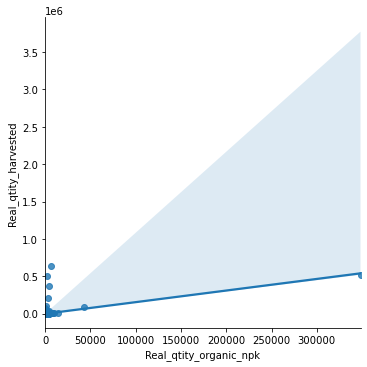

In [35]:
sns.lmplot(x='Real_qtity_organic_npk',y='Real_qtity_harvested',data=Beans_df)

In [36]:
Qtity_transf_urea=[]
for urea in Beans_data:
    area=urea[41]
    pk=urea[-8]
    if (pk>=300)&(pk<400):
        Qtity_transf_urea.append(150)
    elif (pk>=400)&(pk<450):
        Qtity_transf_urea.append(155)
    elif (pk>=450)&(pk<500):
        Qtity_transf_urea.append(158)
    elif (pk>=500)&(pk<550):
        Qtity_transf_urea.append(260)
    elif (pk>=550)&(pk<600):
        Qtity_transf_urea.append(265)
    elif (pk>=600)&(pk<650):
        Qtity_transf_urea.append(270)
    elif (pk>=650)&(pk<700):
        Qtity_transf_urea.append(272.5)
    elif (pk>=700)&(pk<750):
        Qtity_transf_urea.append(290)
    elif (pk>=750)&(pk<775):
        Qtity_transf_urea.append(300)
    elif (pk>=775)&(pk<800):
        Qtity_transf_urea.append(305)
    elif (pk>=800)&(pk<900):
        Qtity_transf_urea.append(310)
    elif (pk>=900)&(pk<950):
        Qtity_transf_urea.append(315)
    elif (pk>=950)&(pk<1000):
        Qtity_transf_urea.append(320)
    elif (pk>=1000)&(pk<1100):
        Qtity_transf_urea.append(325)
    elif (pk>=1100)&(pk<1300):
        Qtity_transf_urea.append(340)
    elif (pk>=1300)&(pk<1500):
        Qtity_transf_urea.append(350)
    elif (pk>=1500)&(pk<1800):
        Qtity_transf_urea.append(375)
    elif (pk>=1800):
        Qtity_transf_urea.append(400)
    elif (pk>0)&(pk<=50):
        Qtity_transf_urea.append(55)
    elif (pk>50)&(pk<=51):
        Qtity_transf_urea.append(75)
    elif (pk>51)&(pk<=75):
        Qtity_transf_urea.append(85)
    elif (pk>75)&(pk<=100):
        Qtity_transf_urea.append(100)
    elif (pk>100)&(pk<=110):
        Qtity_transf_urea.append(112)
    elif (pk==0)&(area<75):
        Qtity_transf_urea.append(0)
    elif (pk==0)&(area>=75)&(area<110):
        Qtity_transf_urea.append(0.4)
    elif (pk==0)&(area>=110)&(area<210):
        Qtity_transf_urea.append(0.27)
    elif (pk==0)&(area>=210)&(area<300):
        Qtity_transf_urea.append(1.5)
    elif (pk==0)&(area>=300)&(area<410):
        Qtity_transf_urea.append(2.15)
    elif (pk==0)&(area>=410)&(area<530):
        Qtity_transf_urea.append(4.6)
    elif (pk==0)&(area>=530)&(area<570):
        Qtity_transf_urea.append(4.2)
    elif (pk==0)&(area>=570)&(area<700):
        Qtity_transf_urea.append(4.8)
    elif (pk==0)&(area>=700)&(area<850):
        Qtity_transf_urea.append(5.95)
    elif (pk==0)&(area>=850)&(area<1100):
        Qtity_transf_urea.append(7.25)
    elif (pk==0)&(area>=1100)&(area<1400):
        Qtity_transf_urea.append(9.25)
    elif (pk==0)&(area>=1400)&(area<1680):
        Qtity_transf_urea.append(10.2)
    #elif pk==0:
       # Qtity_transf_npk.append(100)
    else:
        Qtity_transf_urea.append(pk)

In [37]:
Beans_df['Total_qtity_uree']=Qtity_transf_urea

<ipython-input-37-0d4950ee5c29>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
Beans_df['Real_qtity_organic_urea']=(Beans_df['Total_qtity_uree']*Beans_df['crop_area_sq'])/10000

<ipython-input-38-2f233b9fed96>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



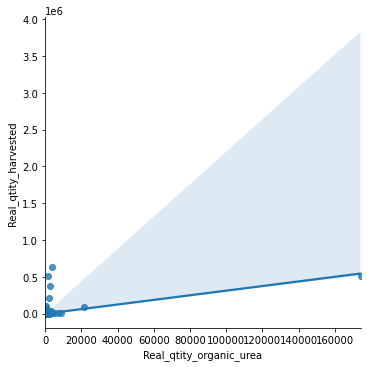

In [39]:
sns.lmplot(x='Real_qtity_organic_urea',y='Real_qtity_harvested',data=Beans_df)

In [40]:
Beans_df.columns

Index(['Unnamed: 0', 'combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_met

In [41]:
Beans_data1=Beans_df.values

In [42]:
Precipitation_new1=[]
for prec in Beans_data1:
    i=prec[-7]
    p=prec[-25]
    
    
    if (i>=60000):
        Precipitation_new1.append(880)
         
    elif (i>=50000) & (i<60000):
        Precipitation_new1.append(860)
        
    elif (i>=30000) & (i<50000):
        Precipitation_new1.append(840)
    elif (i>=25000) & (i<30000):
        Precipitation_new1.append(830)
    elif (i>=12000) & (i<25000):
        Precipitation_new1.append(820)
    elif (i>=8000) & (i<12000):
        Precipitation_new1.append(800)
    elif (i>=6000) & (i<8000):
        Precipitation_new1.append(770)
    elif (i>=4900) & (i<6000):
        Precipitation_new1.append(805)
    elif (i>=4700) & (i<4900):
        Precipitation_new1.append(760)
    elif (i>=4200) & (i<4700):
        Precipitation_new1.append(740)
    elif (i>=3700) & (i<4200):
        Precipitation_new1.append(720)
    elif (i>=3400) & (i<3700):
        Precipitation_new1.append(710)
    elif (i>=3000) & (i<3400):
        Precipitation_new1.append(700)
    elif (i>=2800) & (i<3000):
        Precipitation_new1.append(690)
    elif (i>=2400) & (i<2800):
        Precipitation_new1.append(680)
    elif (i>=2200) & (i<2400):
        Precipitation_new1.append(670)
    elif (i>=2100) & (i<2200):
        Precipitation_new1.append(665)
    elif (i>=1950) & (i<2100):
        Precipitation_new1.append(660)
    elif (i>=1850) & (i<1950):
        Precipitation_new1.append(650)
    elif (i>=1750) & (i<1850):
        Precipitation_new1.append(640)
    elif (i>=1650) & (i<1750):
        Precipitation_new1.append(630)
    elif (i>=1600) & (i<1650):
        Precipitation_new1.append(620)
    elif (i>=1500) & (i<1600):
        Precipitation_new1.append(610)
    elif (i>=1450) & (i<1500):
        Precipitation_new1.append(610)
    elif (i>=1400) & (i<1450):
        Precipitation_new1.append(600)
    elif (i>=1350) & (i<1400):
        Precipitation_new1.append(595)
    elif (i>=1300) & (i<1350):
        Precipitation_new1.append(590)
    elif (i>=1200) & (i<1300):
        Precipitation_new1.append(580)
    elif (i>=1150) & (i<1200):
        Precipitation_new1.append(570)
    elif (i>=1100) & (i<1150):
        Precipitation_new1.append(580)
    elif (i>=1000) & (i<1100):
        Precipitation_new1.append(560)
    elif (i>=950) & (i<1000):
        Precipitation_new1.append(550)
    elif (i>=900) & (i<950):
        Precipitation_new1.append(540)
    elif (i>=900) & (i<950):
        Precipitation_new1.append(535)
    
        
    elif i<20:
        Precipitation_new1.append(250)
    elif (i>=20) & (i<100):
        Precipitation_new1.append(280)
    elif (i>=100) & (i<200):
        Precipitation_new1.append(320)
    elif (i>=200) & (i<300):
        Precipitation_new1.append(340)
    elif (i>=300) & (i<400):
        Precipitation_new1.append(370)
    elif (i>=400) & (i<500):
        Precipitation_new1.append(400)
    elif (i>=500) & (i<550):
        Precipitation_new1.append(600)
    elif (i>=550) & (i<600):
        Precipitation_new1.append(610)
    elif (i>=600) & (i<650):
        Precipitation_new1.append(600)
    elif (i>=650) & (i<680):
        Precipitation_new1.append(640)
        
        
    elif (i>=680) & (i<700):
        Precipitation_new1.append(630)
    elif (i>=700) & (i<710):
        Precipitation_new1.append(640)
    elif (i>=710) & (i<720):
        Precipitation_new1.append(650)
    elif (i>=720) & (i<740):
        Precipitation_new1.append(660)
    elif (i>=740) & (i<750):
        Precipitation_new1.append(670)
        
       
    else:
        Precipitation_new1.append(p)
    

In [43]:
Beans_df['Precipitation_new_one']=Precipitation_new1

<ipython-input-43-2878ed3f9bca>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



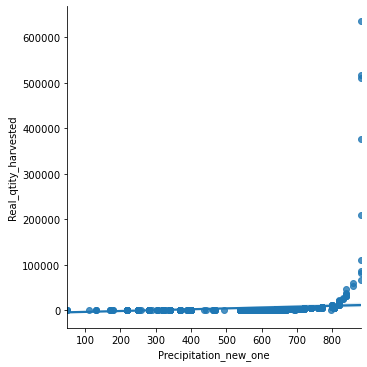

In [44]:
sns.lmplot(x='Precipitation_new_one',y='Real_qtity_harvested',data=Beans_df)

In [45]:
Beans_data2=Beans_df.values

In [46]:
radiation=[]
for solar in Beans_data2:
    i=solar[-8]
    r=solar[-31]
    
    if (i>=60000):
        radiation.append(1200)
         
    elif (i>=50000) & (i<1000):
        radiation.append(980)
        
    elif (i>=30000) & (i<50000):
        radiation.append(950)
    elif (i>=25000) & (i<30000):
        radiation.append(920)
    elif (i>=12000) & (i<25000):
        radiation.append(900)
    elif (i>=8000) & (i<12000):
        radiation.append(900)
    elif (i>=6000) & (i<8000):
        radiation.append(890)
    elif (i>=4900) & (i<6000):
        radiation.append(880)
    elif (i>=4700) & (i<4900):
        radiation.append(870)
    elif (i>=4200) & (i<4700):
        radiation.append(850)
    elif (i>=3700) & (i<4200):
        radiation.append(830)
    elif (i>=3400) & (i<3700):
        radiation.append(820)
    elif (i>=3000) & (i<3400):
        radiation.append(810)
    elif (i>=2800) & (i<3000):
        radiation.append(800)
    elif (i>=2400) & (i<2800):
        radiation.append(780)
    elif (i>=2200) & (i<2400):
        radiation.append(770)
    elif (i>=2100) & (i<2200):
        radiation.append(755)
    elif (i>=1950) & (i<2100):
        radiation.append(740)
    elif (i>=1850) & (i<1950):
        radiation.append(730)
    elif (i>=1750) & (i<1850):
        radiation.append(720)
    elif (i>=1650) & (i<1750):
        radiation.append(710)
    elif (i>=1600) & (i<1650):
        radiation.append(690)
    elif (i>=1500) & (i<1600):
        radiation.append(680)
    elif (i>=1450) & (i<1500):
        radiation.append(640)
    elif (i>=1400) & (i<1450):
        radiation.append(600)
    elif (i>=1350) & (i<1400):
        radiation.append(595)
    elif (i>=1300) & (i<1350):
        radiation.append(590)
    elif (i>=1200) & (i<1300):
        radiation.append(580)
    elif (i>=1150) & (i<1200):
        radiation.append(570)
    elif (i>=1100) & (i<1150):
        radiation.append(580)
    elif (i>=1000) & (i<1100):
        radiation.append(560)
    elif (i>=950) & (i<1000):
        radiation.append(550)
    elif (i>=900) & (i<950):
        radiation.append(540)
    elif (i>=900) & (i<950):
        radiation.append(535)
    
        
    elif i<20:
        radiation.append(250)
    elif (i>=20) & (i<100):
        radiation.append(280)
    elif (i>=100) & (i<200):
        radiation.append(320)
    elif (i>=200) & (i<300):
        radiation.append(340)
    elif (i>=300) & (i<400):
        radiation.append(370)
    elif (i>=400) & (i<500):
        radiation.append(400)
    elif (i>=500) & (i<550):
        radiation.append(450)
    elif (i>=550) & (i<600):
        radiation.append(480)
    elif (i>=600) & (i<650):
        radiation.append(490)
    elif (i>=650) & (i<680):
        radiation.append(500)
    elif i<0:
        radiation.append(200)
    elif (i>=-2500) & (i<-2000):
        radiation.append(150)
    elif (i>=-2000) & (i<-1500):
        radiation.append(120)
    elif (i>=-1500) & (i<-500):
        radiation.append(100)
    
    else:
        radiation.append(r)
    

In [47]:
Beans_df['Radion_new']=radiation

<ipython-input-47-de172d9553cd>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



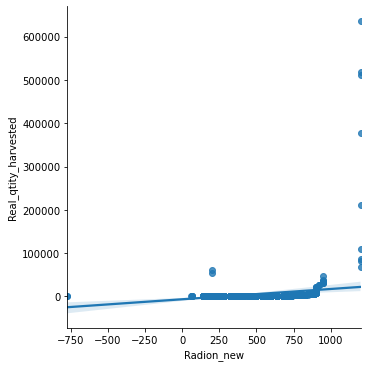

In [48]:
sns.lmplot(x='Radion_new',y='Real_qtity_harvested', data=Beans_df)

In [49]:
#Working on Data description for more understanding the data
Beans_df.describe()

Unnamed: 0     Unique_id     Segment_id  Plot_number  Plot_Area_sqm  \
count  25880.000000  2.588000e+04   25880.000000  25880.00000   2.097400e+04   
mean   38886.757342  3.143040e+07  380439.748570     25.71534   3.714056e+03   
std    22463.405847  2.029656e+07  167915.383907     16.69048   5.477764e+04   
min        0.000000  1.200450e+05   12004.000000      1.00000   1.417700e+01   
25%    20537.250000  1.211032e+07  231122.750000     12.00000   4.880495e+02   
50%    40520.500000  2.811173e+07  421102.000000     25.00000   9.811259e+02   
75%    57964.500000  5.311022e+07  533017.000000     38.00000   2.043802e+03   
max    76657.000000  5.720594e+07  572059.000000     98.00000   4.467209e+06   

       Number_of_crops  Crop_Area_sqm  Crop_Area_ha  Qtity_seeds_sown  \
count     25880.000000   2.580200e+04  25880.000000      25880.000000   
mean          2.716306   1.488168e+03      0.255598         18.939689   
std           1.121629   3.681878e+04      4.812855        271.600034   
min           1.000000   6.372000e-04      0.000142          0.000770   
25%           2.000000   9.111035e-02      0.027210          3.000000   
50%           3.000000   1.527090e+02      0.059045          6.000000   
75%           3.000000   6.332667e+02      0.122729         12.000000   
max           9.000000   4.243848e+06    435.323600      26820.000000   

       Total_qtity_harvested  ...  Real_qtity_seeds_sown  \
count           25880.000000  ...           25880.000000   
mean              897.702628  ...              15.882300   
std               704.926815  ...             264.920401   
min               500.000000  ...               0.024101   
25%               560.000000  ...               2.145966   
50%               674.289896  ...               4.450728   
75%              1060.462937  ...               9.000218   
max             65064.116134  ...           26100.000000   

       Real_qtity_harvested  Total_qtity_organic_fertiliser  \
count          25880.000000                    25880.000000   
mean             266.585536                     1024.706337   
std             6758.439516                       65.810574   
min                0.120000                     1000.000000   
25%               20.370964                     1000.000000   
50%               46.000000                     1000.000000   
75%              100.000000                     1000.000000   
max           636000.000000                     1200.000000   

       Real_qtity_organic_fertiliser  Total_qtity_npk  Real_qtity_organic_npk  \
count                   25880.000000     25880.000000            25880.000000   
mean                      274.079136       338.540967               54.876152   
std                      5665.643761       382.746255             2191.846538   
min                         0.141770         0.000000                0.000000   
25%                        27.759431         9.250000                0.523238   
50%                        60.212251        14.250000                2.363339   
75%                       125.055850       800.000000               30.689918   
max                    522388.320000       800.000000           348258.880000   

       Total_qtity_uree  Real_qtity_organic_urea  Precipitation_new_one  \
count      25880.000000             25880.000000           25880.000000   
mean         170.478158                28.207368             296.357415   
std          190.489775              1097.529415              73.148805   
min            0.000000                 0.000000              50.000000   
25%            5.950000                 0.369477             280.000000   
50%            9.250000                 1.532721             280.000000   
75%          400.000000                15.508932             320.000000   
max          400.000000            174129.440000             880.000000   

         Radion_new  
count  25880.000000  
mean     294.673180  
std       76.102178  
min     -771.586250  
25%  

In [50]:
district_Areagrp=pd.DataFrame(Beans_df.groupby('District_name')['Crop_Area_ha'].mean())
district_Areagrp.head()

Crop_Area_ha
District_name              
BUGESERA           0.646381
BURERA             0.038649
GAKENKE            0.032305
GASABO             0.126649
GATSIBO            0.288469

In [51]:
district_Areagrp1=district_Areagrp.reset_index()
district_Areagrp1.head()

District_name  Crop_Area_ha
0      BUGESERA      0.646381
1        BURERA      0.038649
2       GAKENKE      0.032305
3        GASABO      0.126649
4       GATSIBO      0.288469

In [52]:
beans_district=pd.DataFrame(Beans_df.groupby('District_name')['Yield'].mean())
beans_district.head()

Yield
District_name            
BUGESERA       841.982847
BURERA         872.823314
GAKENKE        824.616872
GASABO         889.762599
GATSIBO        943.876227

In [53]:
beans_district1=beans_district.reset_index()
beans_district1.head()

District_name       Yield
0      BUGESERA  841.982847
1        BURERA  872.823314
2       GAKENKE  824.616872
3        GASABO  889.762599
4       GATSIBO  943.876227

In [54]:
df_area_yld=pd.merge(district_Areagrp,beans_district, on='District_name').reset_index()
df_area_yld.head()

District_name  Crop_Area_ha       Yield
0      BUGESERA      0.646381  841.982847
1        BURERA      0.038649  872.823314
2       GAKENKE      0.032305  824.616872
3        GASABO      0.126649  889.762599
4       GATSIBO      0.288469  943.876227

In [55]:
df_area_yld.sort_values(by='Crop_Area_ha', inplace=True)

In [56]:
trace1= {'type' : 'scatter',
             'x' : df_area_yld['Crop_Area_ha'],
             'y' : df_area_yld['Yield'],
             'name' : 'Crop Area and yield relationship per district',
             'mode' : 'lines'}

In [57]:
data=Data([trace1])
layout = {'title' : 'Area and yield per district',
         'xaxis' : {'title' : 'Crop area'},
         'yaxis' : {'title' : 'crop yield'}}

C:\Users\Jean Damascene\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [58]:
fig = Figure(data = data, layout = layout)
pyo.iplot(fig)

In [59]:
beans_district_year_yield1=pd.DataFrame(Beans_df.groupby(['District_name','Agri_year'])['Yield'].mean())
beans_district_year_yield1=beans_district_year_yield1.reset_index()
beans_district_year_yield1.head()

District_name  Agri_year        Yield
0      BUGESERA  2016_2017   913.818430
1      BUGESERA  2017_2018  1032.059398
2      BUGESERA  2018_2019   648.815454
3        BURERA  2016_2017   935.586547
4        BURERA  2017_2018   759.937017

In [60]:
beans_district_year_yield_pvt=beans_district_year_yield1.pivot(index='District_name',columns='Agri_year', values='Yield')
beans_district_year_yield_pvt=beans_district_year_yield_pvt.reset_index()
beans_district_year_yield_pvt.head()

Agri_year District_name    2016_2017    2017_2018   2018_2019
0              BUGESERA   913.818430  1032.059398  648.815454
1                BURERA   935.586547   759.937017  881.913865
2               GAKENKE  1035.729667   562.741936  818.059678
3                GASABO  1039.952505   907.950055  773.555697
4               GATSIBO   994.884789   990.321736  865.248187

In [61]:
df_merged_area_yield=pd.merge(district_Areagrp1,beans_district_year_yield_pvt, on='District_name')
df_merged_area_yield.head()

District_name  Crop_Area_ha    2016_2017    2017_2018   2018_2019
0      BUGESERA      0.646381   913.818430  1032.059398  648.815454
1        BURERA      0.038649   935.586547   759.937017  881.913865
2       GAKENKE      0.032305  1035.729667   562.741936  818.059678
3        GASABO      0.126649  1039.952505   907.950055  773.555697
4       GATSIBO      0.288469   994.884789   990.321736  865.248187

In [62]:
df_merged_area_yield.sort_values(by='Crop_Area_ha', inplace=True)

In [63]:
trace10= {'type' : 'scatter',
             'x' : df_merged_area_yield['Crop_Area_ha'],
             'y' : df_merged_area_yield['2016_2017'],
             'name' : '2016_2017',
             'mode' : 'lines+markers'}
trace20= {'type' : 'scatter',
             'x' : df_merged_area_yield['Crop_Area_ha'],
             'y' : df_merged_area_yield['2017_2018'],
             'name' : '2017_2018',
             'mode' : 'lines+markers'}
trace30= {'type' : 'scatter',
             'x' : df_merged_area_yield['Crop_Area_ha'],
             'y' : df_merged_area_yield['2018_2019'],
             'name' : '2018_2019',
             'mode' : 'lines+markers'}

In [64]:
data=Data([trace10,trace20,trace30])

C:\Users\Jean Damascene\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [65]:
layout = {'title' : 'Beans yield from 2017 - 2019',
         'xaxis' : {'title' : 'Crop area in ha'},
         'yaxis' : {'title' : 'Bush bean yield'} 
         }

In [66]:
fig = Figure(data = data, layout = layout)
pyo.iplot(fig)

In [67]:
#Working on smothing lines
smothingtrace10= {'type' : 'scatter',
             'x' : df_merged_area_yield['Crop_Area_ha'],
             'y' : df_merged_area_yield['2016_2017'],
             'name' : '2016_2017',
             'mode' : 'lines+markers',
             'line' : {'smoothing' : 0.8,
                        'shape' : 'spline'}}

smothingtrace20= {'type' : 'scatter',
             'x' : df_merged_area_yield['Crop_Area_ha'],
             'y' : df_merged_area_yield['2017_2018'],
             'name' : '2017_2018',
             'mode' : 'lines+markers',
         'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

smothingtrace30= {'type' : 'scatter',
             'x' : df_merged_area_yield['Crop_Area_ha'],
             'y' : df_merged_area_yield['2018_2019'],
             'name' : '2018_2019',
             'mode' : 'lines+markers',
                 'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}


In [68]:
data1=Data([smothingtrace10,smothingtrace20,smothingtrace30])

In [69]:
layout1 = {'title' : 'Beans yield from 2017 - 2019',
         'xaxis' : {'title' : 'Crop area in hectare'},
         'yaxis' : {'title' : 'Bush bean yield'} 
         }

In [70]:
fig1 = Figure(data = data1, layout = layout1)
pyo.iplot(fig1)

In [71]:
#Working on smothing lines +markers
smothingtrace11= {'type' : 'scatter',
             'x' : df_merged_area_yield['District_name'],
             'y' : df_merged_area_yield['2016_2017'],
             'name' : '2016_2017',
             'mode' : 'lines',
             'line' : {'smoothing' : 0.8,
                        'shape' : 'spline'}}

smothingtrace21= {'type' : 'scatter',
             'x' : df_merged_area_yield['District_name'],
             'y' : df_merged_area_yield['2017_2018'],
             'name' : '2017_2018',
             'mode' : 'lines',
         'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

smothingtrace31= {'type' : 'scatter',
             'x' : df_merged_area_yield['District_name'],
             'y' : df_merged_area_yield['2018_2019'],
             'name' : '2017_2018',
             'mode' : 'lines',
                 'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}


In [72]:
data2=Data([smothingtrace11,smothingtrace21,smothingtrace31])

In [73]:
layout2 = {'title' : 'Beans yield from 2017 - 2019',
         'xaxis' : {'title' : 'District name'},
         'yaxis' : {'title' : 'Bush bean yield'} 
         }

In [74]:
fig2 = Figure(data = data2, layout = layout2)
pyo.iplot(fig2)

In [75]:
#Working on smothing lines +markers
smothingtrace12= {'type' : 'scatter',
             'x' : df_merged_area_yield['District_name'],
             'y' : df_merged_area_yield['2016_2017'],
             'name' : '2016_2017',
             'mode' : 'lines+markers',
             'line' : {'smoothing' : 0.8,
                        'shape' : 'spline'}}

smothingtrace22= {'type' : 'scatter',
             'x' : df_merged_area_yield['District_name'],
             'y' : df_merged_area_yield['2017_2018'],
             'name' : '2017_2018',
             'mode' : 'lines+markers',
         'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

smothingtrace32= {'type' : 'scatter',
             'x' : df_merged_area_yield['District_name'],
             'y' : df_merged_area_yield['2018_2019'],
             'name' : '2017_2018',
             'mode' : 'lines+markers',
                 'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}


In [76]:
data3=Data([smothingtrace12,smothingtrace22,smothingtrace32])
layout3 = {'title' : 'Beans yield from 2017 - 2019',
         'xaxis' : {'title' : 'District name'},
         'yaxis' : {'title' : 'Bush bean yield'} 
         }

In [77]:
fig3 = Figure(data = data3, layout = layout3)
pyo.iplot(fig3)

In [78]:
beans_season=pd.DataFrame(Beans_df.groupby('Season1')['Yield'].mean())
#beans_season.sort_values(by='index', inplace=True)

In [79]:
beanRateTrace = {'type' : 'scatter',
                  'x' : beans_season.index,
                  'y' : beans_season['Yield'],
                'mode' : 'lines+markers',
                 'line' : {'shape' : 'hv'},
                'name' : 'Bean Base Rate'}

layout = {'title' : 'The line plot based on season from 2017 to 2019',
         'xaxis' : {'title' : 'AgricultureSeason'},
         'yaxis' : {'title' : 'Bush bean yield'}}

data = Data([beanRateTrace])

fig = Figure(data = data, layout = layout)

pyo.iplot(fig)

In [80]:
beans_district_season=pd.DataFrame(Beans_df.groupby(['District_name','Season1'])['Yield'].mean())
beans_district_season=beans_district_season.reset_index()
beans_district_season.head()

District_name      Season1        Yield
0      BUGESERA  SeasonA2017   695.497843
1      BUGESERA  SeasonA2018   787.854794
2      BUGESERA  SeasonA2019   558.795138
3      BUGESERA  SeasonB2017   847.616401
4      BUGESERA  SeasonB2018  1075.597737

In [81]:
#Working on crop yield per season from 2017 to 2019
beans_district_season_pvt=beans_district_season.pivot(index='District_name',columns='Season1', values='Yield').fillna(0)
beans_district_season_pvt=beans_district_season_pvt.reset_index()
beans_district_season_pvt.head()

Season1 District_name  SeasonA2017  SeasonA2018  SeasonA2019  SeasonB2017  \
0            BUGESERA   695.497843   787.854794   558.795138   847.616401   
1              BURERA  1027.692883   786.321936   896.493354   443.219103   
2             GAKENKE  1269.925906   544.920198   853.957495   186.768302   
3              GASABO  1179.597834  1069.283740   781.448267   856.729910   
4             GATSIBO  1129.421483  1159.239666   876.674507   828.425357   

Season1  SeasonB2018  SeasonB2019  SeasonC2017  SeasonC2018  SeasonC2019  
0        1075.597737   687.225967  1350.922111  1942.198247  1258.049854  
1         696.613210   860.279784  2851.587627     0.000000     0.000000  
2         580.563674   756.900434     0.000000     0.000000     0.000000  
3         691.030814   761.012379     0.000000     0.000000   851.170690  
4         805.731549   855.828024  2255.436034  1471.490928   607.937283

In [82]:
#Working on smothing lines +markers
smothingtrace13= {'type' : 'scatter',
             'x' : beans_district_season_pvt['District_name'],
             'y' : beans_district_season_pvt['SeasonA2017'],
             'name' : 'SeasonA2017',
             'mode' : 'lines+markers',
             'line' : {'smoothing' : 0.8,
                        'shape' : 'spline'}}

smothingtrace23= {'type' : 'scatter',
             'x' : beans_district_season_pvt['District_name'],
             'y' : beans_district_season_pvt['SeasonA2018'],
             'name' : 'SeasonA2018',
             'mode' : 'lines+markers',
         'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

smothingtrace33= {'type' : 'scatter',
             'x' : beans_district_season_pvt['District_name'],
             'y' : beans_district_season_pvt['SeasonA2019'],
             'name' : 'SeasonA2019',
             'mode' : 'lines+markers',
                 'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

smothingtrace43= {'type' : 'scatter',
             'x' : beans_district_season_pvt['District_name'],
             'y' : beans_district_season_pvt['SeasonB2017'],
             'name' : 'SeasonB2017',
             'mode' : 'lines+markers',
             'line' : {'smoothing' : 0.8,
                        'shape' : 'spline'}}

smothingtrace53= {'type' : 'scatter',
             'x' : beans_district_season_pvt['District_name'],
             'y' : beans_district_season_pvt['SeasonB2018'],
             'name' : 'SeasonB2018',
             'mode' : 'lines+markers',
         'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

smothingtrace63= {'type' : 'scatter',
             'x' : beans_district_season_pvt['District_name'],
             'y' : beans_district_season_pvt['SeasonB2019'],
             'name' : 'SeasonB2019',
             'mode' : 'lines+markers',
                 'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}
smothingtrace73= {'type' : 'scatter',
             'x' : beans_district_season_pvt['District_name'],
             'y' : beans_district_season_pvt['SeasonC2017'],
             'name' : 'SeasonC2017',
             'mode' : 'lines+markers',
             'line' : {'smoothing' : 0.8,
                        'shape' : 'spline'}}

smothingtrace83= {'type' : 'scatter',
             'x' : beans_district_season_pvt['District_name'],
             'y' : beans_district_season_pvt['SeasonC2018'],
             'name' : 'SeasonC2018',
             'mode' : 'lines+markers',
         'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

smothingtrace93= {'type' : 'scatter',
             'x' : beans_district_season_pvt['District_name'],
             'y' : beans_district_season_pvt['SeasonC2019'],
             'name' : 'SeasonC2019',
             'mode' : 'lines+markers',
                 'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}




In [83]:
data4=Data([smothingtrace13,smothingtrace23,smothingtrace33,smothingtrace43,smothingtrace53,
          smothingtrace63,smothingtrace73,smothingtrace83,smothingtrace93])

layout4 = {'title' : 'Beans yield per season in every district',
         'xaxis' : {'title' : 'AgricultureSeason'},
         'yaxis' : {'title' : 'Bush bean yield'}}

C:\Users\Jean Damascene\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [84]:
fig = Figure(data = data4, layout = layout4)

pyo.iplot(fig)

In [85]:
beans_croping_system=pd.DataFrame(Beans_df.groupby('Cropping_system')['Yield'].mean())
beans_croping_system


Yield
Cropping_system            
Mixed            825.095543
Pure             772.503118

In [86]:
beans = {'type' : 'bar',
                     'x' :beans_croping_system.index,
                     'y' : beans_croping_system['Yield']}

layout = {'title' : "Beans yield based on cropping system",
         'xaxis' : {'title' : 'cropping system'},
         'yaxis' : {'title' : 'Bush Beans yield'},
         'annotations' : [{
                          'font' : {'color' : 'lightblue',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : [beans],
      'layout' : layout}
pyo.iplot(fig)

In [87]:
beans_croping_system1=pd.DataFrame(Beans_df.groupby(['Agri_year','Cropping_system'])['Yield'].mean())
beans_croping_system1=beans_croping_system1.reset_index()
beans_croping_system1

Agri_year Cropping_system       Yield
0  2016_2017           Mixed  898.389277
1  2016_2017            Pure  824.544813
2  2017_2018           Mixed  867.087055
3  2017_2018            Pure  789.622525
4  2018_2019           Mixed  743.092079
5  2018_2019            Pure  718.108517

In [88]:
agryear=list(beans_croping_system1['Agri_year'].unique())
agryear

['2016_2017', '2017_2018', '2018_2019']

In [89]:
traces50=[]

for a in agryear:
    traces50.append({'type' : 'bar',
                  'name' : a,
                  'x' : beans_croping_system1.loc[beans_croping_system1['Agri_year'] == a, 'Cropping_system'],
                  'y' : beans_croping_system1.loc[beans_croping_system1['Agri_year'] == a, 'Yield']})
    
layout = {'title' : "Bush Beans yield by cropping system from agriculture 2017 to  2019",
         'xaxis' : {'title' : 'Cropping System'},
         'yaxis' : {'title' : 'Bush Beans yield'},
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : traces50, 'layout' : layout}
pyo.iplot(fig)

In [90]:
beans = {'type' : 'bar',
                     'x' :beans_season.index,
                     'y' : beans_season['Yield']}

layout = {'title' : " Beans yield by Season from 2017 to 2019",
         'xaxis' : {'title' : 'Season'},
         'yaxis' : {'title' : 'crop yield'},
         'annotations' : [{
                          'font' : {'color' : 'lightblue',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : [beans],
      'layout' : layout}
pyo.iplot(fig)

In [91]:
fig['data'][0].update({'marker' : {'color' : 'lightblue'}})
pyo.iplot(fig)

In [92]:
beans_year=pd.DataFrame(Beans_df.groupby('Agri_year')['Yield'].mean())
beans_year

Yield
Agri_year            
2016_2017  890.534024
2017_2018  856.744480
2018_2019  740.454020

In [93]:
beans = {'type' : 'bar',
                     'x' :beans_year.index,
                     'y' : beans_year['Yield']}
            

layout = {'title' : "Crop yield per agriculture year",
         'xaxis' : {'title' : 'Agriculture Year'},
         'yaxis' : {'title' : 'Beans yield'},
         'annotations' : [{
                          'font' : {'color' : 'cyan',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}

fig = {'data' : [beans],
      'layout' : layout}
pyo.iplot(fig)


In [94]:
beans_yield = {'type' : 'bar',
                     'x' : beans_season.index,
                     'y' : beans_season['Yield'],
                     'marker' : {'color' : 'lightblue',
                                'line' : {'color' : '#333',
                                          'width' : 3}},
                     'opacity' : 0.5,}
                     

layout = {'title' : "Crop yield by season from 2017 to 2019",
         'xaxis' : {'title' : 'Season'},
         'yaxis' : {'title' : 'Bush Beans yield'},
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : [beans_yield],
      'layout' : layout}
pyo.iplot(fig)

In [95]:
colours = ['lightblue' if x != 'SeasonC2017' else 'purple' for x in beans_season.index ]
beans_yield = {'type' : 'bar',
                     'x' : beans_season.index,
                     'y' : beans_season['Yield'],
                     'marker' : {'color' : colours,
                                'line' : {'color' : '#333',
                                          'width' : 3}},
                     'opacity' : 0.5,}
                     

layout = {'title' : "Crop yield per season",
         'xaxis' : {'title' : 'All Seasons'},
         'yaxis' : {'title' : 'Bush Beans yield'},
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : [beans_yield],
      'layout' : layout}
pyo.iplot(fig)

In [96]:
#colours = ['indianred' if x != 'MUSANZE' else 'lightblue' for x in beans_season.index ]

beans_yield = {'type' : 'bar',
                     'x' : beans_district.index,
                     'y' : beans_district['Yield'],
                     'marker' : {'color' : 'indianred',
                                'line' : {'color' : '#333',
                                          'width' : 3}},
                     'opacity' : 0.5,}
                     

layout = {'title' : "Crop yield per District",
         'xaxis' : {'title' : 'Districtname'},
         'yaxis' : {'title' : 'Beans yield'},
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : [beans_yield],
      'layout' : layout}
pyo.iplot(fig)

In [97]:
beans_district_year=pd.DataFrame(Beans_df.groupby(['District_name','Agri_year'])['Yield'].mean())
beans_district_year=beans_district_year.reset_index()
beans_district_year.head()

District_name  Agri_year        Yield
0      BUGESERA  2016_2017   913.818430
1      BUGESERA  2017_2018  1032.059398
2      BUGESERA  2018_2019   648.815454
3        BURERA  2016_2017   935.586547
4        BURERA  2017_2018   759.937017

In [98]:
district = list(beans_district_year['District_name'].unique())


In [99]:
traces = []
for d in district:
    traces.append({'type' : 'bar',
                  'name' : d,
                    'orientation':'h',
                  'y' : beans_district_year.loc[beans_district_year['District_name'] == d, 'Agri_year'],
                  'x' : beans_district_year.loc[beans_district_year['District_name'] == d, 'Yield']})
    
layout = {'title' : "Bush Beans yield by district,from agriculture year 2017 to 2019",
         'xaxis' : {'title' : 'Agriculture year'},
         'yaxis' : {'title' : 'Bush Beans yield'},
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : traces, 'layout' : layout}
pyo.iplot(fig)

In [100]:
Agri_years = list(beans_district_year['Agri_year'].unique())
Agri_years

['2016_2017', '2017_2018', '2018_2019']

In [101]:
traces = []
for y in Agri_years:
    traces.append({'type' : 'bar',
                  'name' : str(y),
                  'x' : beans_district_year.loc[beans_district_year['Agri_year'] == y, 'District_name'],
                  'y' : beans_district_year.loc[beans_district_year['Agri_year'] == y, 'Yield']})
    
layout = {'title' : "Beans yield by Agriculture year,in all districts",
         'xaxis' : {'title' : 'District_name'},
         'yaxis' : {'title' : 'Beans yield'},
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : traces, 'layout' : layout}
pyo.iplot(fig)

In [102]:
#plotting the stacked barchart
traces = []
for y in Agri_years:
    traces.append({'type' : 'bar',
                  'name' : str(y),
                  'x' : beans_district_year.loc[beans_district_year['Agri_year'] == y, 'District_name'],
                  'y' : beans_district_year.loc[beans_district_year['Agri_year'] == y, 'Yield']})
    
layout = {'title' : "Bush bean yield by Agriculture year,in all districts",
         'xaxis' : {'title' : 'District_name'},
         'yaxis' : {'title' : 'Bush Beans yield'},
          'barmode' : 'stack',
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : traces, 'layout' : layout}
pyo.iplot(fig)

In [103]:
traces = []
for d in district:
    traces.append({'type' : 'bar',
                  'name' : d,
                  'x' : beans_district_year.loc[beans_district_year['District_name'] == d, 'Agri_year'],
                  'y' : beans_district_year.loc[beans_district_year['District_name'] == d, 'Yield']})
    
layout = {'title' : "Beans yield by district,from agriculture year 2017 - 2019",
         'xaxis' : {'title' : 'Agriculture year'},
         'yaxis' : {'title' : 'Beanss yield'},
          'barmode':'stack',
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : traces, 'layout' : layout}
pyo.iplot(fig)

In [104]:
traces = []
for d in district:
    traces.append({'type' : 'bar',
                   'orientation':'h',
                  'name' : d,
                  'y' : beans_district_year.loc[beans_district_year['District_name'] == d, 'Agri_year'],
                  'x' : beans_district_year.loc[beans_district_year['District_name'] == d, 'Yield']})
    
layout = {'title' : "Beans yield by district,from agriculture year 2017 - 2019",
         'xaxis' : {'title' : 'Beans yield'},
         'yaxis' : {'title' :'Agriculture year' },
          'barmode':'stack',
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : traces, 'layout' : layout}
pyo.iplot(fig)

In [105]:
traces = []
for d in district:
    traces.append({'type' : 'bar',
                  'name' : d,
                  'x' : beans_district_season.loc[beans_district_season['District_name'] == d, 'Season1'],
                  'y' : beans_district_season.loc[beans_district_season['District_name'] == d, 'Yield']})
    
layout = {'title' : "Beans yield by district in all seasons",
         'xaxis' : {'title' : 'Seasons'},
         'yaxis' : {'title' : 'Beans yield'},
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : traces, 'layout' : layout}
pyo.iplot(fig)

In [106]:
season=list(beans_district_season['Season1'].unique())
season

['SeasonA2017',
 'SeasonA2018',
 'SeasonA2019',
 'SeasonB2017',
 'SeasonB2018',
 'SeasonB2019',
 'SeasonC2017',
 'SeasonC2018',
 'SeasonC2019']

In [107]:
traces = []
for s in season:
    traces.append({'type' : 'bar',
                  'name' : s,
                  'x' : beans_district_season.loc[beans_district_season['Season1'] == s, 'District_name'],
                  'y' : beans_district_season.loc[beans_district_season['Season1'] == s, 'Yield']})
    
layout = {'title' : "Beans yield by district in all seasons",
         'xaxis' : {'title' : 'District name'},
         'yaxis' : {'title' : 'Bush Beans yield'},
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : traces, 'layout' : layout}
pyo.iplot(fig)

In [108]:
traces = []
for s in season:
    traces.append({'type' : 'bar',
                  'name' : s,
                  'x' : beans_district_season.loc[beans_district_season['Season1'] == s, 'District_name'],
                  'y' : beans_district_season.loc[beans_district_season['Season1'] == s, 'Yield']})
    
layout = {'title' : "Beans yield by district in all seasons",
         'xaxis' : {'title' : 'District name'},
         'yaxis' : {'title' : 'Bush Beans yield'},
          'barmode':'stack',
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : traces, 'layout' : layout}
pyo.iplot(fig)

In [109]:
beans_district_season1=pd.DataFrame(Beans_df.groupby(['District_name','Season1'])['Yield'].count())
beans_district_season1=beans_district_season1.reset_index()
beans_district_season1.head()

District_name      Season1  Yield
0      BUGESERA  SeasonA2017     88
1      BUGESERA  SeasonA2018    162
2      BUGESERA  SeasonA2019    213
3      BUGESERA  SeasonB2017    238
4      BUGESERA  SeasonB2018    177

In [110]:
bean_season_count=beans_district_season1.pivot(index='District_name',columns='Season1', values='Yield')
bean_season_count.head()

Season1        SeasonA2017  SeasonA2018  SeasonA2019  SeasonB2017  \
District_name                                                       
BUGESERA              88.0        162.0        213.0        238.0   
BURERA                38.0         24.0         46.0         11.0   
GAKENKE               29.0         14.0         46.0          8.0   
GASABO               185.0        160.0        281.0        141.0   
GATSIBO              441.0        257.0        430.0        364.0   

Season1        SeasonB2018  SeasonB2019  SeasonC2017  SeasonC2018  SeasonC2019  
District_name                                                                   
BUGESERA             177.0        293.0         80.0         35.0         13.0  
BURERA                10.0         31.0          1.0          NaN          NaN  
GAKENKE               14.0         27.0          NaN          NaN          NaN  
GASABO               119.0        183.0          NaN          NaN          1.0  
GATSIBO              243.0        385.0          1.0          3.0          5.0

In [111]:
bean_season_count.fillna(value=0, inplace=True)
bean_season_count.head()

Season1        SeasonA2017  SeasonA2018  SeasonA2019  SeasonB2017  \
District_name                                                       
BUGESERA              88.0        162.0        213.0        238.0   
BURERA                38.0         24.0         46.0         11.0   
GAKENKE               29.0         14.0         46.0          8.0   
GASABO               185.0        160.0        281.0        141.0   
GATSIBO              441.0        257.0        430.0        364.0   

Season1        SeasonB2018  SeasonB2019  SeasonC2017  SeasonC2018  SeasonC2019  
District_name                                                                   
BUGESERA             177.0        293.0         80.0         35.0         13.0  
BURERA                10.0         31.0          1.0          0.0          0.0  
GAKENKE               14.0         27.0          0.0          0.0          0.0  
GASABO               119.0        183.0          0.0          0.0          1.0  
GATSIBO              243.0        385.0          1.0          3.0          5.0

In [112]:
#Create a new variable to make addition of all value per season
bean_season_count['Total']=bean_season_count.sum(axis=1)

In [113]:
for s in season:
    bean_season_count["{}_ps".format(s)] = bean_season_count[s] / bean_season_count['Total']
bean_season_count.head()

Season1        SeasonA2017  SeasonA2018  SeasonA2019  SeasonB2017  \
District_name                                                       
BUGESERA              88.0        162.0        213.0        238.0   
BURERA                38.0         24.0         46.0         11.0   
GAKENKE               29.0         14.0         46.0          8.0   
GASABO               185.0        160.0        281.0        141.0   
GATSIBO              441.0        257.0        430.0        364.0   

Season1        SeasonB2018  SeasonB2019  SeasonC2017  SeasonC2018  \
District_name                                                       
BUGESERA             177.0        293.0         80.0         35.0   
BURERA                10.0         31.0          1.0          0.0   
GAKENKE               14.0         27.0          0.0          0.0   
GASABO               119.0        183.0          0.0          0.0   
GATSIBO              243.0        385.0          1.0          3.0   

Season1        SeasonC2019   Total  SeasonA2017_ps  SeasonA2018_ps  \
District_name                                                        
BUGESERA              13.0  1299.0        0.067744        0.124711   
BURERA                 0.0   161.0        0.236025        0.149068   
GAKENKE                0.0   138.0        0.210145        0.101449   
GASABO                 1.0  1070.0        0.172897        0.149533   
GATSIBO                5.0  2129.0        0.207140        0.120714   

Season1        SeasonA2019_ps  SeasonB2017_ps  SeasonB2018_ps  SeasonB2019_ps  \
District_name                                                                   
BUGESERA             0.163972        0.183218        0.136259        0.225558   
BURERA               0.285714        0.068323        0.062112        0.192547   
GAKENKE              0.333333        0.057971        0.101449        0.195652   
GASABO               0.262617        0.131776        0.111215        0.171028   
GATSIBO              0.201973        0.170972        0.114138        0.180836   

Season1        SeasonC2017_ps  SeasonC2018_ps  SeasonC2019_ps  
District_name                                                  
BUGESERA             0.061586        0.026944        0.010008  
BURERA               0.006211        0.000000        0.000000  
GAKENKE              0.000000        0.000000        0.000000  
GASABO               0.000000        0.000000        0.000935  
GATSIBO              0.000470        0.001409        0.002349

In [114]:
psseason = [s + "_ps" for s in season]

sortKeys = dict(bean_season_count[psseason].sum())

psseason = sorted(psseason, key=lambda k: sortKeys[k], reverse=True)
psseason

['SeasonA2019_ps',
 'SeasonB2019_ps',
 'SeasonA2017_ps',
 'SeasonA2018_ps',
 'SeasonB2017_ps',
 'SeasonB2018_ps',
 'SeasonC2017_ps',
 'SeasonC2018_ps',
 'SeasonC2019_ps']

In [115]:
traces = []

for s in psseason:
    traces.append({'type' : 'bar',
                  'name' : s[:-3],
                  'x' : bean_season_count.index,
                  'y' : bean_season_count[s],
                  'opacity' : 0.7})

pyo.iplot(traces)

In [116]:
layout = {'title' : "Proportion of crop yield per season in different district",
          'barmode' : 'stack',
         'xaxis' : {'title' : 'District name'},
         'yaxis' : {'title' : 'Proportion of yield',
                   'tickformat' : '%',
                   'hoverformat' : '%',},
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : traces, 'layout' : layout}
pyo.iplot(fig)

In [117]:
Beans_dframe=Beans_df[['Precipitation_new_one', 'Radion_new','Real_qtity_organic_urea',
 'Real_qtity_organic_npk','Real_qtity_organic_fertiliser','Real_qtity_seeds_sown',
 'Crop_Area_ha','Cropping_system','Number_of_crops',
 'Type_seeds_sown','Usage_pesticides','Irrigation_use','Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed','Real_qtity_harvested']]
Beans_dframe.head()

Precipitation_new_one  Radion_new  Real_qtity_organic_urea  \
0                  250.0       250.0                 0.176287   
2                  280.0       280.0                13.156919   
3                  280.0       280.0                 9.336224   
4                  320.0       320.0                 1.303164   
6                  280.0       280.0                 0.173330   

   Real_qtity_organic_npk  Real_qtity_organic_fertiliser  \
0                0.260758                      36.726419   
2               26.313838                      32.892298   
3               18.672448                      23.340560   
4                1.927596                     271.492451   
6                0.256384                      36.110453   

   Real_qtity_seeds_sown  Crop_Area_ha Cropping_system  Number_of_crops  \
0               2.350491      0.036726           Mixed              2.0   
2               5.591691      0.032892            Pure              1.0   
3               3.967895      0.023341           Mixed              2.0   
4              16.832532      0.271492           Mixed              2.0   
6               2.419400      0.036110            Pure              1.0   

     Type_seeds_sown Usage_pesticides Irrigation_use    Elevation  \
0  Traditional seeds               no             no  1455.778894   
2  Traditional seeds               no             no  1455.778894   
3  Traditional seeds               no             no  1455.778894   
4  Traditional seeds               no             no  1455.778894   
6  Traditional seeds               no             no  1455.778894   

   Minimum_temp  Maximum_temp   Humidity  Average_Wind_speed  Windspeed  \
0     17.072376     27.629834  58.974818            3.577364   2.799273   
2     17.072376     27.629834  58.974818            3.577364   2.799273   
3     17.072376     27.629834  58.974818            3.577364   2.799273   
4     17.072376     27.629834  58.974818            3.577364   2.799273   
6     17.072376     27.629834  58.974818            3.577364   2.799273   

   Real_qtity_harvested  
0             19.097738  
2             20.000000  
3             25.000000  
4            180.000000  
6             21.305167

In [118]:
#Transforming the categorical variables into dummies variables
Beans_dframe=pd.get_dummies(Beans_dframe,columns=['Cropping_system'])
Beans_dframe=pd.get_dummies(Beans_dframe,columns=['Type_seeds_sown'])
Beans_dframe=pd.get_dummies(Beans_dframe,columns=['Usage_pesticides'])
Beans_dframe=pd.get_dummies(Beans_dframe,columns=['Irrigation_use'])

In [119]:
Beans_dframe.rename(columns={'Precipitation_new_one':'Precipitation',
                         'Radion_new':'Solar_radiatio',
                         'Real_qtity_organic_urea':'Total_qtity_urea',
                         'Real_qtity_organic_npk':'Total_qtity_npk',
                         'Real_qtity_organic_fertiliser':'Total_qtity_organic_fertiliser',
                         'Real_qtity_seeds_sown':'Total_qtity_seeds',
                         'Real_qtity_harvested':'Targted_variable'
                        }, inplace=True)

<AxesSubplot:>

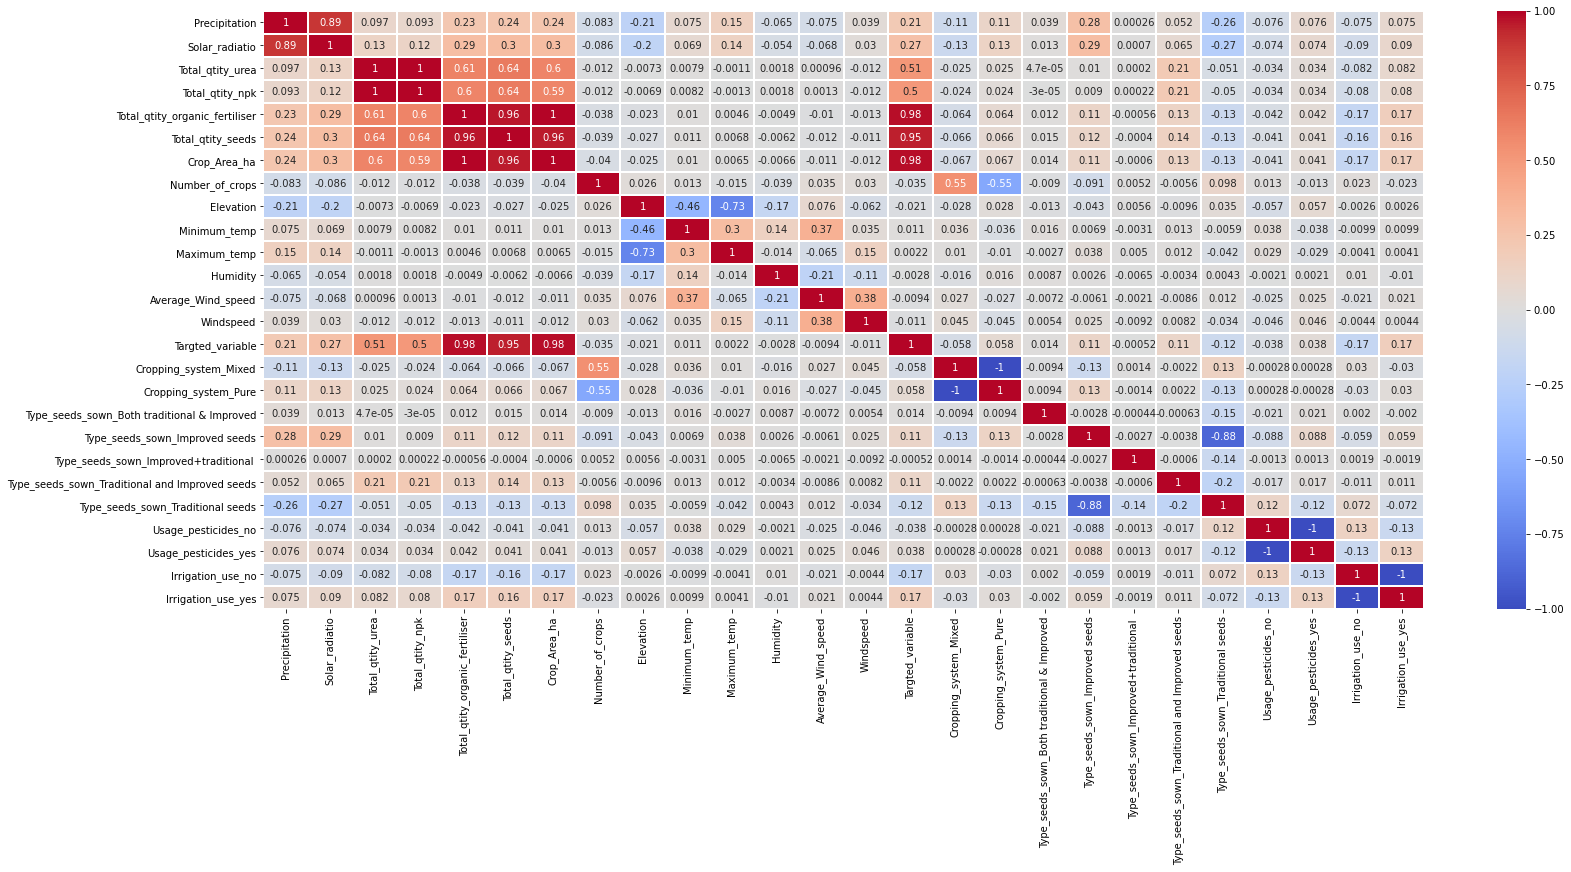

In [120]:
plt.figure(figsize=(26,11))
sns.heatmap(Beans_dframe.corr(),cmap='coolwarm', annot=True, linecolor='white',linewidths=1)

In [121]:
Beans_dframe.rename(columns={'Targted_variable':'Production'}, inplace=True)

In [400]:
Beans_dframe['Total_qtity_urea_a']=Beans_dframe['Total_qtity_urea']/1000
Beans_dframe['Total_qtity_npk_a']=Beans_dframe['Total_qtity_npk']/1000
Beans_dframe['Precipitation_a']=Beans_dframe['Precipitation']/1000

Beans_dframe['Elevation_a']=Beans_dframe['Elevation']/12
Beans_dframe['Precipitation_a']=Beans_dframe['Precipitation']/12
Beans_dframe['Solar_radiatio_a']=Beans_dframe['Solar_radiatio']/12

Beans_dframe['Total_qtity_organic_fertiliser_a']=Beans_dframe['Total_qtity_organic_fertiliser']/1000
Beans_dframe['Total_qtity_seeds_a']=Beans_dframe['Total_qtity_seeds']/1000
Beans_dframe['Production_a']=Beans_dframe['Production']/1000

In [401]:
#'Cropping_system_Pure','Type_seeds_sown_Improved seeds','Total_qtity_urea', 'Crop_Area_ha_a'
#'Type_seeds_sown_Traditional and Improved seeds'
#'Total_qtity_npk_a', 'Total_qtity_organic_fertiliser_a', 'Total_qtity_seeds_a','Crop_Area_ha','Irrigation_use_yes'
X=Beans_dframe[['Precipitation_a', 'Solar_radiatio_a']]

y=Beans_dframe['Production_a']

In [402]:
from sklearn.model_selection import train_test_split

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [404]:
from sklearn.preprocessing import MinMaxScaler


In [405]:
scaler = MinMaxScaler()

In [406]:
X_train= scaler.fit_transform(X_train)

In [407]:
X_test = scaler.transform(X_test)

In [408]:
X_train.shape

(19410, 2)

In [409]:
X_test.shape

(6470, 2)

Neural Network Learning as Optimization A deep learning neural network learns to map a set of inputs to a set of outputs from training data.

We cannot calculate the perfect weights for a neural network; there are too many unknowns. Instead, the problem of learning is cast as a search or optimization problem and an algorithm is used to navigate the space of possible sets of weights the model may use in order to make good or good enough predictions.

Typically, a neural network model is trained using the stochastic gradient descent optimization algorithm and weights are updated using the backpropagation of error algorithm



# Creating a model

In [410]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [411]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

# Training the model

In [412]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
152/152 [==============================] - 2s 5ms/step - loss: 16.1506 - val_loss: 133.9465
Epoch 2/400
152/152 [==============================] - 0s 3ms/step - loss: 16.0556 - val_loss: 133.4741
Epoch 3/400
152/152 [==============================] - 0s 3ms/step - loss: 15.8652 - val_loss: 132.0986
Epoch 4/400
152/152 [==============================] - 0s 3ms/step - loss: 15.4704 - val_loss: 129.8613
Epoch 5/400
152/152 [==============================] - 0s 3ms/step - loss: 15.3513 - val_loss: 129.0163
Epoch 6/400
152/152 [==============================] - 0s 3ms/step - loss: 15.2867 - val_loss: 129.0471
Epoch 7/400
152/152 [==============================] - 1s 3ms/step - loss: 15.1042 - val_loss: 127.6354
Epoch 8/400
152/152 [==============================] - 1s 4ms/step - loss: 15.1121 - val_loss: 128.4582
Epoch 9/400
152/152 [==============================] - 1s 4ms/step - loss: 14.9201 - val_loss: 128.0052
Epoch 10/400
152/152 [==============================] - 1s 4ms/s

152/152 [==============================] - ETA: 0s - loss: 0.905 - 1s 4ms/step - loss: 8.0152 - val_loss: 57.4627
Epoch 158/400
152/152 [==============================] - 0s 3ms/step - loss: 7.8464 - val_loss: 65.8714
Epoch 159/400
152/152 [==============================] - 1s 3ms/step - loss: 11.7326 - val_loss: 65.2208
Epoch 160/400
152/152 [==============================] - 0s 3ms/step - loss: 9.9820 - val_loss: 61.6576
Epoch 161/400
152/152 [==============================] - 0s 3ms/step - loss: 8.9845 - val_loss: 70.1379
Epoch 162/400
152/152 [==============================] - 0s 3ms/step - loss: 9.3877 - val_loss: 61.9604
Epoch 163/400
152/152 [==============================] - 0s 3ms/step - loss: 8.0622 - val_loss: 63.0751
Epoch 164/400
152/152 [==============================] - 0s 3ms/step - loss: 8.0032 - val_loss: 60.8157
Epoch 165/400
152/152 [==============================] - 0s 3ms/step - loss: 8.2179 - val_loss: 62.4597
Epoch 166/400
152/152 [==============================

Epoch 314/400
152/152 [==============================] - 0s 3ms/step - loss: 8.0974 - val_loss: 52.4879
Epoch 315/400
152/152 [==============================] - 0s 3ms/step - loss: 8.1523 - val_loss: 52.1505
Epoch 316/400
152/152 [==============================] - 0s 3ms/step - loss: 8.1470 - val_loss: 79.6503
Epoch 317/400
152/152 [==============================] - 0s 3ms/step - loss: 11.5089 - val_loss: 59.5987
Epoch 318/400
152/152 [==============================] - 0s 3ms/step - loss: 8.1609 - val_loss: 56.6506
Epoch 319/400
152/152 [==============================] - 0s 3ms/step - loss: 7.9786 - val_loss: 54.3421
Epoch 320/400
152/152 [==============================] - 0s 3ms/step - loss: 7.9097 - val_loss: 56.6862
Epoch 321/400
152/152 [==============================] - 0s 3ms/step - loss: 8.0317 - val_loss: 56.4343
Epoch 322/400
152/152 [==============================] - 0s 3ms/step - loss: 8.1630 - val_loss: 55.4884
Epoch 323/400
152/152 [==============================] - 1s 3ms

In [413]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

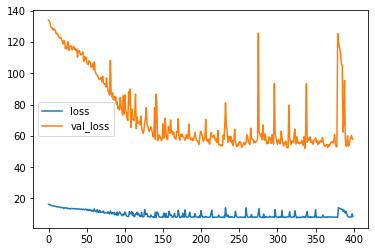

In [414]:
losses.plot()

Evaluation on Test Dataset

he explained_variance_score computes the explained variance regression score.

If is the estimated target output, the corresponding (correct) target output, and is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

The best possible score is 1.0, lower values are worse.

In [415]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [416]:
predictions = model.predict(X_test)

In [417]:
predictions.shape

(6470, 1)

In [418]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2_score',metrics.r2_score(y_test, predictions))

MAE: 0.2868759663936924
MSE: 57.78405949950133
RMSE: 7.601582697011283
r2_score 0.5691619128490337


In [419]:
explained_variance_score(y_test,predictions)

0.5692088177505186

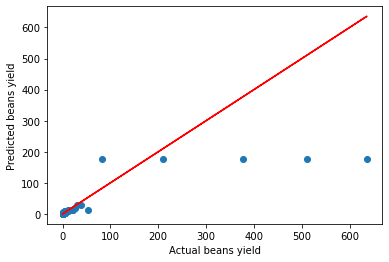

In [420]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')
plt.xlabel('Actual beans yield')
plt.ylabel('Predicted beans yield')
plt.show()

# Working on Principal Component Analysis for Feature Reductions

PCA Visualization As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [421]:
#'Cropping_system_Pure','Type_seeds_sown_Improved seeds','Total_qtity_urea', 'Crop_Area_ha_a'
#'Type_seeds_sown_Traditional and Improved seeds'
X=Beans_dframe[['Precipitation_a', 'Solar_radiatio_a',
       'Total_qtity_npk_a', 'Total_qtity_organic_fertiliser_a',
       'Total_qtity_seeds_a','Crop_Area_ha'
        ,'Irrigation_use_yes']]

y=Beans_dframe['Production_a']

In [422]:
from sklearn.preprocessing import StandardScaler

In [423]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [424]:
scaled_data = scaler.transform(X)

In [425]:
from sklearn.decomposition import PCA

In [426]:
pca = PCA(n_components=4)

In [427]:
pca.fit(scaled_data)

PCA(n_components=4)

In [428]:
X_pca= pca.transform(scaled_data)

In [429]:
X_pca.shape

(25880, 4)

In [430]:
scaled_data.shape

(25880, 7)

In [431]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca,y,test_size=0.25,random_state=101)

In [432]:
print(X_train.shape,Y_train.shape)

(19410, 4) (19410,)


In [433]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout,Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [434]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [435]:
model.fit(x=X_train,y=Y_train.values,verbose=0,
          validation_data=(X_test,Y_test.values),
          batch_size=128,epochs=400)

In [436]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

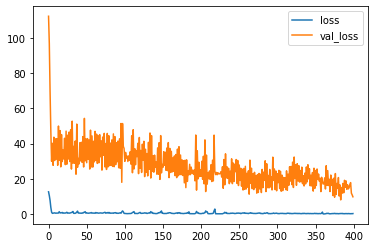

In [437]:
losses.plot()

In [438]:
predicted1=model.predict(X_test)

In [439]:
from sklearn.metrics import r2_score
# calculate these metrics by hand!
from sklearn import metrics

In [440]:
print('MAE:', metrics.mean_absolute_error(Y_test, predicted1))
print('MSE:', metrics.mean_squared_error(Y_test, predicted1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predicted1)))
print('r2_score:',metrics.r2_score(Y_test, predicted1))

MAE: 0.12615196404382617
MSE: 9.820182723159206
RMSE: 3.133717077714452
r2_score: 0.9267806939047716


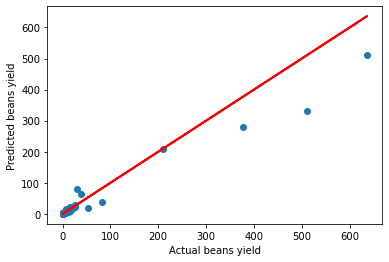

In [441]:
# Our predictions
plt.scatter(Y_test,predicted1)

# Perfect predictions
plt.plot(Y_test,Y_test,'r',linewidth=2)
plt.xlabel('Actual beans yield')
plt.ylabel('Predicted beans yield')
plt.show()

# Working on Linear Regression Model

Now, we'll keep moving along with using scikit learn to do a multi variable regression. This will be a similar apporach to the above example, but sci kit learn will be able to take into account more than just a single data variable effecting the target!

We'll start by importing the linear regression library from the sklearn module.

The sklearn.linear_model.LinearRegression class is an estimator. Estimators predict a value based on the observed data. In scikit-learn, all estimators implement the fit() and predict() methods. The former method is used to learn the parameters of a model, and the latter method is used to predict the value of a response variable for an explanatory variable using the learned parameters. It is easy to experiment with different models using scikit-learn because all estimators implement the fit and predict methods.

In [442]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_pca, y, test_size=0.25, random_state=101)

In [443]:
from sklearn.linear_model import LinearRegression

In [444]:
lreg = LinearRegression()

In [445]:
lreg.fit(X_train1,y_train1)

LinearRegression()

#Let's go ahead check the intercept and number of coefficients

In [446]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

 The estimated intercept coefficient is 0.24 


In [447]:
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The number of coefficients used was 4 


In [448]:
print(lreg.coef_)

[ 2.64811922  0.90840212  0.16745449 -1.10355872]


In [449]:
# Print shapes of the training and testing data sets
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(19410, 4) (6470, 4) (19410,) (6470,)


# Predicting Beans yield
Now that we have our training and testing sets, let's go ahead and try to use them to predict beans yield. We'll use our training set for the prediction and then use our testing set for validation

In [450]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train1)
pred_test = lreg.predict(X_test1)

In [451]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((y_train1 - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((y_test1 - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 0.38
Fit a model X_train, and calculate MSE with X_test and Y_test: 14.64


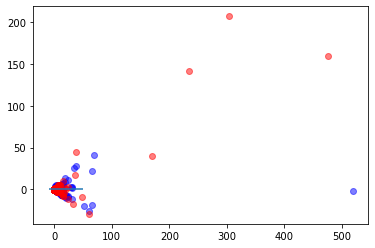

In [452]:
# Scatter plot the training data
plt.scatter(pred_train,(y_train1-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
plt.scatter(pred_test,(y_test1-pred_test),c='r',alpha=0.5)
# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
#plt.legend((y_train1,y_test),
        #   ('Training','Test'),
       #    loc='lower left')

#plt.title('Residual Plots')

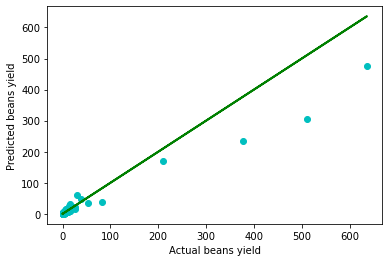

In [453]:
# Our predictions
plt.scatter(y_test,pred_test,color='c', marker='o')

# Perfect predictions
plt.plot(y_test,y_test,'g',linewidth=2)
plt.xlabel('Actual beans yield')
plt.ylabel('Predicted beans yield')
plt.show()

In [454]:
print('MAE:', metrics.mean_absolute_error(y_test1, pred_test))
print('MSE:', metrics.mean_squared_error(y_test1, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, pred_test)))
print('r2_score:',metrics.r2_score(y_test1, pred_test))

MAE: 0.17712574984172394
MSE: 14.64016781806067
RMSE: 3.8262472238553364
r2_score: 0.890842873399076


# Working on Polynomial Linear Regression Model

In [455]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [456]:
#Define the polynomial features
poly=PolynomialFeatures(degree=2)

In [457]:
#Split our data into training set and test set
poly_X_train1, poly_X_test1, poly_Y_train1, poly_Y_test1 = train_test_split(X_pca, y, test_size = 0.25, random_state = 4)

In [458]:
#Make transformation of predictors for both training and test sets
poly_X_train=poly.fit_transform(poly_X_train1)
poly_X_test=poly.fit_transform(poly_X_test1)

In [459]:
model=lreg.fit(poly_X_train,poly_Y_train1)# Create our model
model

LinearRegression()

In [460]:
regression.fit(poly_X_train,poly_Y_train1)# Create our model


LinearRegression()

In [461]:
#Predicting our needed value
pred_test=model.predict(poly_X_test)
pred_train=model.predict(poly_X_train)

In [462]:
# Model evaluations
print('MAE:', metrics.mean_absolute_error(poly_Y_test1, pred_test))
print('MSE:', metrics.mean_squared_error(poly_Y_test1, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(poly_Y_test1, pred_test)))
print('r2_score:',metrics.r2_score(poly_Y_test1, pred_test))

MAE: 0.11096432999535777
MSE: 3.4721627503148675
RMSE: 1.8633740231941809
r2_score: 0.946494010135026
